In [7]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing dataset
path = '/content/drive/MyDrive/Data Science Projects/Classification/User_Data.csv'

df= pd.read_csv(path)

#featuring engineering
gender = np.array(df['Gender'].unique())
gender_dict = {key:index for index,key in enumerate(gender,0)}
df['Gender'] = df['Gender'].map(gender_dict)


#defining the Independent and Dependent variable
X = df[['Age', 'EstimatedSalary']].copy()
y = df['Purchased'].copy()


#Splitting the data set into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

In [9]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
predict = rfc_model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
def model_result(predictions):
  print(f'The accuracy score of the model is: {accuracy_score(y_test,predictions)}')

In [12]:
model_result(predict)

The accuracy score of the model is: 0.9125


In [13]:
rfc_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<Axes: >

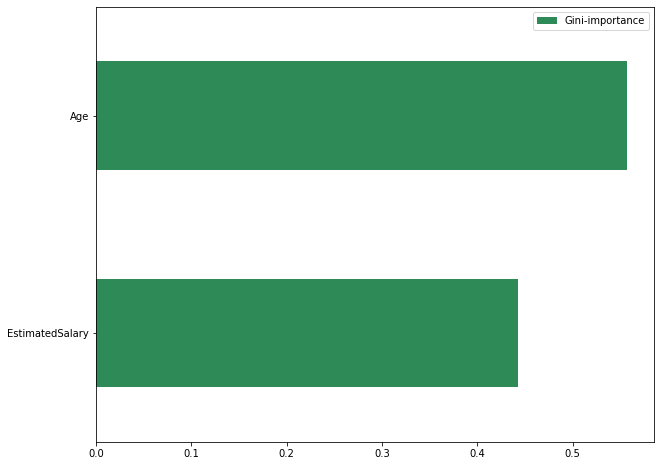

In [18]:
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, rfc_model.feature_importances_):
     feats[feature] = importance #add the name/value pair 


importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='barh', 
color="SeaGreen",figsize=(10,8))